# Тема “Обучение без учителя”

In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.cluster import KMeans

In [8]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.datasets import load_boston

In [18]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.manifold import TSNE

### Задание 1


Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [11]:
boston = load_boston()

In [14]:
data = boston["data"]
feature_names = boston["feature_names"]

In [15]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
target = boston["target"]

In [17]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [20]:
scaler = StandardScaler()

In [22]:
X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [23]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [27]:
X_train_scaled.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [26]:
X_test_scaled.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [28]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [29]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [31]:
type(X_train_tsne)

numpy.ndarray

In [32]:
print('Dataset after TSNE applying:\t{}'.format(X_train_tsne.shape))

Dataset after TSNE applying:	(404, 2)


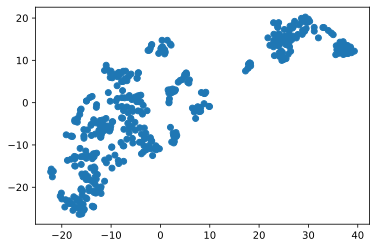

In [33]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [46]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [49]:
k_estb = kmeans.fit_predict(X_train_scaled)

In [55]:
X_train_tsne[labels_train==0].shape

(86, 2)

In [56]:
X_train_tsne[labels_train==1].shape

(127, 2)

In [57]:
X_train_tsne[labels_train==2].shape

(191, 2)

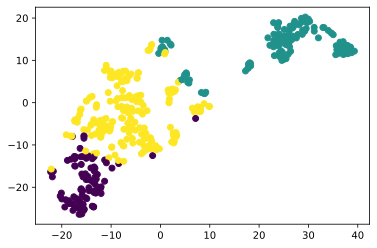

In [39]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [92]:
zero_mean = y_train[k_estb == 0].mean()
zero_mean

price    27.788372
dtype: float64

In [93]:
one_mean = y_train[k_estb == 1].mean()
one_mean

price    16.165354
dtype: float64

In [94]:
two_mean = y_train[k_estb == 2].mean()
two_mean

price    24.958115
dtype: float64

In [68]:
X_train[k_estb == 0]['CRIM'].mean()

0.07356558139534884

In [69]:
X_train[k_estb == 1]['CRIM'].mean()

10.797028425196851

In [70]:
X_train[k_estb== 2]['CRIM'].mean()

0.4216602094240837

In [78]:
np.unique(k_estb)

array([0, 1, 2])

### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [95]:
k_est = kmeans.fit_predict(X_test_scaled)

In [96]:
np.unique(k_est)

array([0, 1, 2])

In [97]:
y_test[k_est == 0].mean()

price    34.553846
dtype: float64

In [98]:
y_test[k_est == 1].mean()

price    16.710526
dtype: float64

In [99]:
y_test[k_est == 2].mean()

price    21.717647
dtype: float64

In [101]:
X_test[k_est== 0]['CRIM'].mean()

0.0830846153846154

In [102]:
X_test[k_est== 1]['CRIM'].mean()

9.419181842105264

In [103]:
X_test[k_est== 2]['CRIM'].mean()

0.22250117647058823